<a href="https://colab.research.google.com/github/macfeel/Reinforcement-learning/blob/main/015_dataset%E3%81%AE%E8%AA%AD%E8%BE%BC%E3%81%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

importしたモジュールを修正した場合、kernelをその都度リスタートしなくても、jupyter notebookを実行する度に再読み込みしてくれるそうです。

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
# root dirの取得
import os
#root_dir=os.path.abspath(os.sep)

if os.name == 'posix':
    root_dir='/media/macfeel/DataScience'
elif os.name == 'nt':
    root_dir = 'F:'
else:
    pass 

dir=root_dir+'/DataSet/.fastai/data'

## Data Preparation
### その1_ImageDataBunch.from_folder
- ダウンロードするデータは、オプションの**dest**で指定の場所に保存する。
- 作成されたフォルダーはtrainとvalidなので、ImageDataBunch.from_folderの初期設定と同じ。
>　-data/  
　　　-animal/  
　　　　　-train/  
　　　　　　　-dog/    
　　　　　　　　　dog_1.jpg  
　　　　　　　　　dog_2.jpg  
　　　　　　　　　...  
　　　　　　　-cat/  
　　　　　　　　　cat_1.jpg  
　　　　　　　　　cat_2.jpg  
　　　　　　　　　...  
　　　　　-valid/  
　　　　　　　-dog/    
　　　　　　　　　dog_11.jpg  
　　　　　　　　　dog_12.jpg  
　　　　　　　　　...  
　　　　　　　-cat/  
　　　　　　　　　cat_11.jpg  
　　　　　　　　　cat_12.jpg  
　　　　　　　　　...

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE,dest=dir); path

PosixPath('/media/macfeel/DataScience/DataSet/.fastai/data/mnist_sample')

In [ ]:
data=ImageDataBunch.from_folder(path,size=224,bs=64)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
3,3,3,3,3
Path: /media/macfeel/DataScience/DataSet/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
3,3,3,3,3
Path: /media/macfeel/DataScience/DataSet/.fastai/data/mnist_sample;

Test: None

### その2_ImageDataBunch.from_folder
- ダウンロードするデータは、オプションの**dest**で指定の場所に保存する。
- 作成されたフォルダーが、trainingとtestingなので、それぞれtrainとvalidのフォルダーを明示指定する。

In [ ]:
path = untar_data(URLs.MNIST,dest=dir); path

WindowsPath('F:/DataSet/.fastai/data/mnist_png')

In [ ]:
data=ImageDataBunch.from_folder(path,'training','testing',size=224,bs=16)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,0
Path: F:\DataSet\.fastai\data\mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,0
Path: F:\DataSet\.fastai\data\mnist_png;

Test: None

### その3_ImageDataBunch.from_folder
- demoデータではなく、独自のデータをgoogle imagesなどから集めて行う場合、データ量も少なく、これをtrain用と検証用のフォルダーに分けて使うのは非効率ではないか?    

>　-data/  
　　　-animal/  
　　　　　-dog/    
　　　　　　　dog_1.jpg  
　　　　　　　dog_2.jpg  
　　　　　　　...  
　　　　　-cat/  
　　　　　　　cat_1.jpg  
　　　　　　　cat_2.jpg  
　　　　　　　...

In [ ]:
path = dir+'/dogs-cats/image'; path

'F:/DataSet/.fastai/data/dogs-cats/image'

In [ ]:
data=ImageDataBunch.from_folder(path,valid_pct=0.2,size=224,bs=16)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (856 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cat,cat,cat,cat,cat
Path: F:\DataSet\.fastai\data\dogs-cats\image;

Valid: LabelList (213 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dog,cat,dog,dog,dog
Path: F:\DataSet\.fastai\data\dogs-cats\image;

Test: None

### その4_ImageDataBunch.from_name_re
- ダウンロードするデータは、オプションの**dest**で指定の場所に保存する。
- 1つのフォルダーにすべてデータが入っていて、
- imageファイルの名前がクラス名を表す名前になっている場合。  
>　-data/  
　　　-animal/    
　　　　　dog_1.jpg  
　　　　　dog_2.jpg  
　　　　　...    
　　　　　cat_1.jpg  
　　　　　cat_2.jpg  
　　　　　...
　

In [ ]:
path = untar_data(URLs.PETS,dest=dir); path

WindowsPath('F:/DataSet/.fastai/data/oxford-iiit-pet')

In [ ]:
path_anno = path/'annotations'
path_img = path/'images'

fnames = get_image_files(path_img)
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

data = ImageDataBunch.from_name_re(path_img, fnames, pat, size=224, bs=16)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: F:\DataSet\.fastai\data\oxford-iiit-pet\images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_pit_bull_terrier,staffordshire_bull_terrier,Abyssinian,Egyptian_Mau,Maine_Coon
Path: F:\DataSet\.fastai\data\oxford-iiit-pet\images;

Test: None

### その5
- URLs.●●●などでの保存場所の既定値は"~/.fastai/data"になっている。
- これは、~/.fastai/にある、config.ymlで設定されている。  
data_path: ~/.fastai/data  
model_path: ~/.fastai/models
- これを変更することて、保存場所の既定値を変えることが出来る。


In [ ]:
# path = untar_data(URLs.PETS); path

# path_anno = path/'annotations'
# path_img = path/'images'

# fnames = get_image_files(path_img)
# np.random.seed(2)
# pat = r'/([^/]+)_\d+.jpg$'

# data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=tfms, size=224, bs=16).normalize(imagenet_stats)

## --------------------------------------------------------------------------------------------------------------------

In [ ]:
# path.ls()

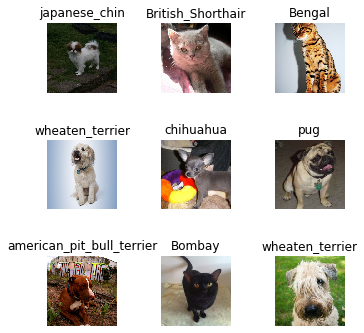

In [ ]:
data.show_batch(rows=3,figsize=(5,5))

クラス名の表示

In [ ]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


クラスの数

In [ ]:
len(data.classes)

37

In [ ]:
data.c

37

In [ ]:
learn1 = cnn_learner(data, models.resnet34, metrics=error_rate)
learn2 = cnn_learner(data, models.resnet34, metrics=error_rate)
learn3 = cnn_learner(data, models.resnet34, metrics=error_rate)
learn4 = cnn_learner(data, models.resnet34, metrics=error_rate)

【注意】`create_cnn` is deprecated and is now named `cnn_learner`

In [ ]:
learn1.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

## Learning rate finder

In [ ]:
learn1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 

In [ ]:
learn1.recorder.plot()

In [ ]:
learn1.fit(4)

In [ ]:
learn2.fit_one_cycle(4)

In [ ]:
learn3.fit_one_cycle(4,max_lr=3e-1)

In [ ]:
learn4.fit_one_cycle(4,max_lr=slice(3e-4,3e-2))

In [ ]:
learn1.save('learn-1')
learn2.save('learn-2')
learn3.save('learn-3')
learn4.save('learn-4')